In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('train_splitted.csv')
df_valid = pd.read_csv('valid_splitted.csv')

X_train = df_train.drop(columns=['ID_code', 'target'])
X_valid = df_valid.drop(columns=['ID_code', 'target'])

y_train = df_train['target']
y_valid = df_valid['target']

df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
119737,train_119737,0,11.0038,-4.5026,9.0662,6.4313,10.7061,-15.2857,5.1233,16.7875,...,-0.8200,3.3085,3.1358,5.0959,19.7160,-0.1801,5.8437,8.8348,17.0461,8.8190
72272,train_72272,0,12.8473,-6.1848,6.8799,2.0164,12.7998,10.2781,4.4191,15.6940,...,1.1516,3.9019,4.6616,7.6035,12.6402,-0.3037,-4.2330,9.7456,14.8337,-3.7167
158154,train_158154,0,13.1827,-0.8344,13.4689,3.9060,13.5984,4.6475,5.9659,24.0557,...,2.8737,5.8939,0.8525,8.7406,16.6641,0.8745,7.0406,8.6424,20.7107,-5.4186
65426,train_65426,0,8.2132,1.2309,11.1464,9.4524,10.2142,4.0416,5.3989,20.4527,...,6.4752,5.7442,2.1907,6.0651,10.9444,-2.0666,-7.9209,9.0522,17.1735,12.4656
30074,train_30074,1,5.5681,4.6355,15.2350,3.0718,11.8178,-15.0502,3.8357,12.0169,...,4.1796,5.6113,-0.1561,3.1010,17.4297,-1.0121,-6.5168,7.9772,18.5248,11.2771


# Bayes rule

Target = 1  
$\large p(t=1|V_0, V_1, ..., V_{199}) = \frac{p(V_0, V_1, ..., V_{199}|t=1)P(t=1)}{p(V_0,V_1, ..., V_{199})} \quad$

Target = 0  
$\large p(t=0|V_0, V_1, ..., V_{199}) = \frac{p(V_0, V_1, ..., V_{199}|t=0)P(t=0)}{p(V_0,V_1, ..., V_{199})} \quad$

# Joint Likelihoods

¿Que necesito estimar para entrenar el modelo?

# Train model

In [3]:
X_train_1 = X_train[y_train==1]
X_train_0 = X_train[y_train==0]
means_vect_1 = X_train_1.mean()
means_vect_0 = X_train_0.mean()
covar_mat_1 = X_train_1.cov()
covar_mat_0 = X_train_0.cov()

P_1 = len(X_train_1)/len(X_train)
P_0 = len(X_train_0)/len(X_train)

print(P_0, P_1)

0.8997125 0.1002875


In [4]:
from scipy.stats import multivariate_normal

# Evaluate Model

In [7]:
def get_odds(X, means_1=means_vect_1, covar_1=covar_mat_1, means_0=means_vect_0, covar_0=covar_mat_0, P_1=P_1, P_0=P_0):
    odds = P_1/P_0*multivariate_normal.pdf(X, mean=means_1, cov=covar_1)/multivariate_normal.pdf(X, mean=means_0, cov=covar_0)
    return odds, np.log(odds), odds/(odds + 1)

## Train

In [16]:
odds_train, log_odds_train, probs_train = get_odds(X_train)

In [9]:
roc_auc_score(y_train, odds_train)

0.9291593614500827

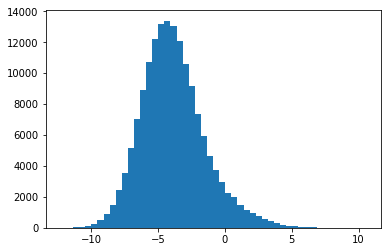

In [10]:
_ = plt.hist(log_odds_train, 50)

In [24]:
((probs_train > 0.5) == y_train).sum()/len(y_train)

0.93574375

## Valid

In [25]:
odds_valid, log_odds_valid, probs_val = get_odds(X_valid)

In [13]:
roc_auc_score(y_valid, odds_valid)

0.8444229069608169

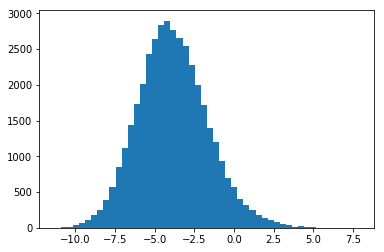

In [29]:
_ = plt.hist(log_odds_valid, 50)

In [30]:
((probs_val > 0.5) == y_valid).sum()/len(y_valid)

0.909175

Por que es pero que el Naive Bayes?

Cuantos parámetros tengo?

In [28]:
print(covar_mat_1.shape, covar_mat_0.shape, means_vect_1.shape, means_vect_0.shape)
params = (np.prod(covar_mat_1.shape), np.prod(covar_mat_0.shape), means_vect_1.shape[0], means_vect_0.shape[0])
print(params)
sum(params)

(200, 200) (200, 200) (200,) (200,)
(40000, 40000, 200, 200)


80400